# Project: TMDb Movie Data Analysis


### _by Osaze Agho_


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id ='intro'></a>
## Introduction

### Dataset Description

This dataset contains information of about 10,800 movies collected from The Movie Database (TMDb), including user ratings and revenue. 


The dataset contains the following features:
- `id` - A unique identifier for each movie

- `imdb_id` - A unique identifier for each movie on IMBD website

- `popularity` - A numeric quantity specifying movie popularity

- `budget` - All costs relating to the development, production, and post-production of the movie

- `revenue` - The total revenue generated through movie sales

- `original_title` - The title of the movie before translation or adaptation

- `cast` - The name of lead and supporting actors

- `homepage` - A link to the original homepage of the movie

- `director` - Name(s) of the person(s) that determine the creative vision of the movie

- `tagline` - Movie's tagline

- `keywords` - The keywords or tags related to the movie

- `overview` - A brief description of the movie

- `runtime` - The running time of the movie in minutes

- `genres` - The category of the movie charactierized by a particular style.e.g  Action, Comedy etc.

- `production_companies` - The production house of the movie

- `release_date` - The date on which the movie was released

- `vote_count` - The count of votes recieved

- `vote_average` - Average ratings the movie recieved

- `release year` - The year in which the movie was released

- `budget_adj` - The budget of the movie in terms of 2010 dollars, accounting for inflation over time

- `revenue_adj` - The revenue of the movie in terms of 2010 dollars, accounting for inflation over time

## Question(s) for Analysis

1. What kinds of properties are associated with movies that have high revenues?


2.  Is there an association between a Movie Success and Popularity?


3. What Movie Genre is most popular amongst people?


4. Over the years, what genre has produced the most movies??


5. Top Directors based on Movie Popularity?


6. When are most movies released in the year?


In [1]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('darkgrid')

<a id ='wrangling'></a>
## Data Wrangling 
In this section, we will:
 - Gather the data
 - Assess the data
 - Clean the data

### | Gather the Data
The data needed to answer the questions will be loaded for analysis

In [2]:
# load dataset and confirm
df = pd.read_csv('tmdb_movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2006-09-15,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2004-01-15,2947,7.3,2015,174799923.1,1.385749e+09


### | Assess the Data 

Assess the data to identify any problems with quality and structure

In [3]:
# explore the shape of the dataset
df.shape

(10866, 21)

The result shows us that this dataset has:
 - Total rows - 10866 
 - Total columns - 21

In [4]:
# explore by showing a concise summary of the dataframe  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

The result above shows:
    
**Null rows in columns**

 - `imdb_id` has 10 null rows
 
 
 - `cast` of 76 rows are null
 
 
 - `homepage` has 7930 null rows
 
 
 - `director` of 44 rows are null 
 
 
 - `tagline` has 2824 null rows
 
 
 - `keywords` has 1493 null rows
 
 
 - `Overview` has 4 null rows
 
 
 - `genres` has 23 null rows
 
 
 - `production_companies` has 1030 null rows
 
 
  **Datatype**
 - Incorrect data type for `release_date` column. Data type shows as string

In [5]:
# check number of missing values in dataframe
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
# check for duplicates in dataset
df.duplicated().sum()

1

**Duplicate rows** 
 - there is only 1 duplicate row

In [7]:
# summary statistics of the numerical columns in the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
# confirm count of minimum value as in budget, revenue, runtime, adj_budget, and adj_revenue columns

df.query('budget == 0').shape[0], df.query('revenue == 0').shape[0],df.query('runtime == 0').shape[0]

(5696, 6016, 31)

 **Summary Statistics**

The summary statistics above show unusual minimum values for budget(adj_budget) , revenue(adj_revenue) , and runtime as Zeros. This was confirmed indicating the count of zero's in those columns:
- `budget`|`adj_budget` have total count of zeros as 5696


- `revenue`|`adj_revenue` has total count of zero as 6016


- `runtime` has total count of zeros as 31

Naturally, a mimumum buget, revenue and runtime of zero is unrealistic. There seem to be a lot of missing budgets, of which TMDB states could likely have been from small budget films. More information provided in the [link](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata).

### | Clean the Data
This involves modifying, replacing, or removing data in our dataframe to ensure quality

_For this project, some columns in the dataset are irrelevant since they add no value during analysis and will be removed._
 - `imdb_id` has 10 null rows and is irrelevant for analysis
 - `homepage` has 7930 null rows, which is almost half of the total rows, and is irrelevant for analysis 
 - `tagline`, `overview`, and `keywords` are unique for every movie and irrelevant for project
  
----  
 I will also be: 
 - dropping the duplicate row  
 
 - converting datatype of the column `release_date` from string to datetime 
----   
In addition, there are numerous rows with **zero** in the `budget` and `revenue` column, and although it will be reasonable to drop those rows, I will leave the rows with the **zeros**. 
I decided to leave the rows to preserve the quality of the entire dataset, because dropping those rows will affect other columns with data.

Likewise, I will not be dropping the NaN values in the `genres` column of the dataframe for the same reasons above. 

----
__However, during my analysis, I will be selecting only the rows and columns that are relevant to draw valuable insights__ 



Hence, drop irrelevant columns

In [9]:
# drop columns stated above
df.drop(['imdb_id', 'homepage','tagline', 'overview', 'keywords'], axis=1, inplace=True)

In [10]:
# confirm dropped columns
df.head(0)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


A duplicate was spotted when the data was assesed and that duplicate row has to be removed

In [11]:
# view the duplicate
df[df.duplicated()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [12]:
# delete the duplicate 
df.drop_duplicates(inplace=True)

In [13]:
# confirm duplicate has been deleted
df.duplicated().sum()

0

The datatype of the column `release_date` has to be converted from string to datetime

In [14]:
# convert from string to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [15]:
# confirm all changes to dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   budget                10865 non-null  int64         
 3   revenue               10865 non-null  int64         
 4   original_title        10865 non-null  object        
 5   cast                  10789 non-null  object        
 6   director              10821 non-null  object        
 7   runtime               10865 non-null  int64         
 8   genres                10842 non-null  object        
 9   production_companies  9835 non-null   object        
 10  release_date          10865 non-null  datetime64[ns]
 11  vote_count            10865 non-null  int64         
 12  vote_average          10865 non-null  float64       
 13  release_year    

<a id='eda'></a>
## Exploratory Data Analysis (EDA)

EDA involves finding patterns in the data, visualizing relationships in the dataset, and building intiution about the data.

Hence, EDA will be used to address the questions asked in the introductory section.

## Q1. What kinds of properties are associated with movies that have high revenues?

In this analysis, I decide to use the `revenue_adj` and `budget_adj` columns because they have been adjusted in terms of 2010 dollars to account for inflation over time, and this will helps to stabilize the variance of seasonal flunctuations.

In [16]:
# view to the total number of rows with zeros in the revenue_adj column
df.query('revenue_adj == 0')['revenue_adj'].count()

6016

From the result above, about 55% of the rows in the `revenue_adj` column are zeros. I have decided not to include the rows with zeros because correlation assumes that all the observations are independent of each other and having too many zeros might affect the analysis.
Hence, for this analysis, I will be selecting only rows in the `revenue_adj` column without a zero value.

In [17]:
# create new dataframe and select only rows without zero and reset index (index starts from 0)
df1 = df.query('revenue_adj != 0').reset_index(drop=True)

In [18]:
# confirm no of rows & total number of rows with zeros in new dataframe
df1.shape[0]   ,  df1.query('revenue_adj == 0').revenue_adj.count()

(4849, 0)

From the result above, we can see that the rows with zero have been exempted from the analysis and the total number of rows are now 4849

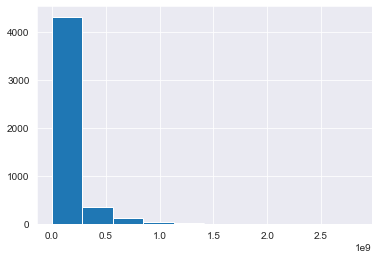

In [19]:
# view histogram to view distribution of revenue
df1.revenue_adj.hist();


The histogram above shows that the data is positively skewed, with majority of movies having revneue below 300 million
Using the adjusted revenue, we can account for the change in revenue over the years.

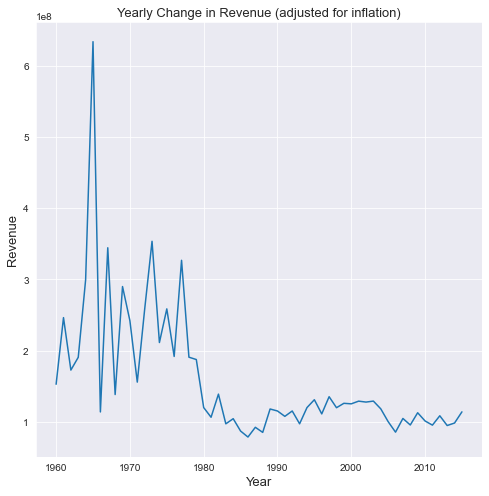

In [20]:
# Plot to show how the adjusted revenue has changed over years

revenue_change = df1.groupby('release_year').revenue_adj.mean()

plt.figure(figsize=(8,8))
display(plt.plot(revenue_change))

plt.title('Yearly Change in Revenue (adjusted for inflation)', fontsize=13)
plt.ylabel('Revenue', fontsize=13)
plt.xlabel('Year', fontsize=13)

plt.show()

The line chart above, there was a abrupt increase in revneue for movies in the mid 60's attainging a record high in revenue from 1960 to 2015. However, after the all time high in revenue in the 60's, there was a continuous decline in revenue with the mid 80's having the lowest revenues for movies. 

To identify the association of properties with high revenue, we would have   the Analysis was also completed below to identify the correlation between several properties and adjusted revenue

In [21]:
# statistical summary of new dataframe (d1)
df1.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4849.000000,4849.000000,4.849000e+03,4.849000e+03,4849.000000,4849.000000,4849.000000,4849.000000,4.849000e+03,4.849000e+03
mean,44575.491648,1.045202,2.956961e+07,8.923886e+07,107.968035,436.283151,6.149000,2000.919777,3.516208e+07,1.151009e+08
std,72368.860461,1.356752,4.051761e+07,1.620801e+08,21.113779,806.485754,0.798707,11.569650,4.376117e+07,1.988557e+08
min,5.000000,0.001117,0.000000e+00,2.000000e+00,15.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.370705e+00
25%,8285.000000,0.387740,1.700000e+06,7.732325e+06,95.000000,46.000000,5.600000,1994.000000,2.329409e+06,1.046585e+07
50%,12154.000000,0.680581,1.500000e+07,3.185308e+07,104.000000,147.000000,6.200000,2004.000000,2.032801e+07,4.395666e+07
75%,43959.000000,1.210502,4.000000e+07,9.996575e+07,117.000000,435.000000,6.700000,2010.000000,4.973516e+07,1.316482e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In order to identify the association between properties and the movies that have high revenues, we need to establish a benchmark to use as a reference point for movies with high revenue.

From the statistical summary above, about 75% of the movies generated revenue below a value of about 131.5 million. 
Hence, the 75% percentile can be used as the benchmark, and movies with revenue above that benchmark an be regarded as high revenue movies.

In [22]:
# select movies with high revenue
high_rev_gauge = df1.revenue_adj.quantile(.75)
high_rev = df1[df1.revenue_adj > high_rev_gauge]

high_rev.shape

(1212, 16)

We can now show the association between some properties and high revenue movies.

First, we will look at the correlation between popularity and high revenue movies

Correlation Between Revenue and Popularity :  0.6090853022669516


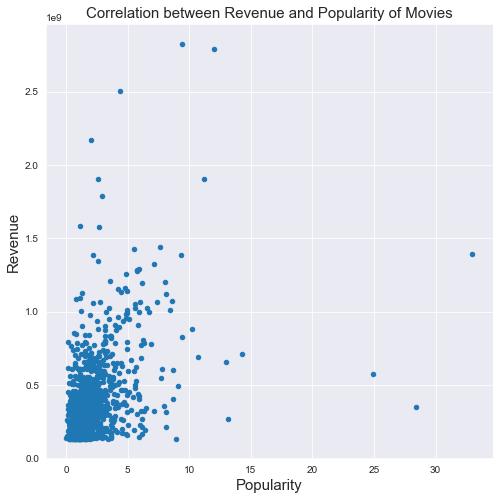

In [23]:
# scatter plot showing the correlation between popularity and high revenue movies
high_rev.plot(x='popularity', y='revenue_adj', kind='scatter', figsize=(8,8))

plt.title("Correlation between Revenue and Popularity of Movies",fontsize=15)
plt.xlabel('Popularity',fontsize=15)
plt.ylabel("Revenue",fontsize= 15);

sns.set_style('darkgrid')

#correlation between the variables
df_corr = df.corr()
print("Correlation Between Revenue and Popularity : ",df_corr.loc['popularity','revenue_adj'])

We will also look at the association between the Average Rating and High Revenue of those Movies

Correlation between Revenue and Average Ratings :  0.19306239300498537


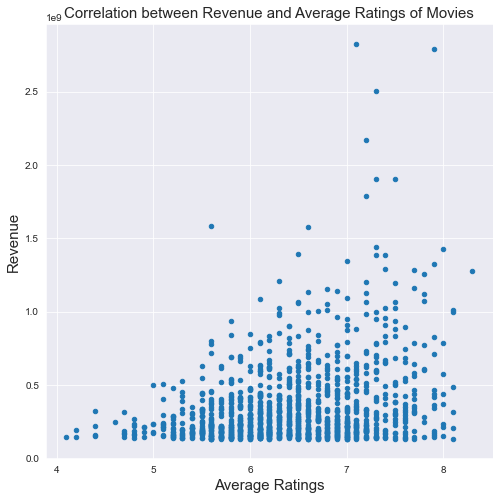

In [24]:
# scatter plot showing the correlation between popularity and high revenue movies

high_rev.plot(x='vote_average', y='revenue_adj', kind='scatter', figsize=(8,8))

plt.title("Correlation between Revenue and Average Ratings of Movies",fontsize=15)
plt.xlabel('Average Ratings',fontsize=15)
plt.ylabel("Revenue",fontsize= 15);


# correlation between the variables
df_corr = df.corr()
print("Correlation between Revenue and Average Ratings : ",df_corr.loc['vote_average','revenue_adj'])

## Q2. Is there an association between a Movie Success and Popularity?

In the movie industry today, a monetarily successful movie comes from the return on investment (ROI). However, a movie with a high budget does not necessarily make it more successful, Expensive, unsuccessful movies do exist. 
 
Hence, in this analysis, the success of a movie will be defined by its `Profit`. 
 
`Profit` will be calculated by subtracting `revenue_adj` from the `budget_adj`.

Hence, for this analysis, I will be using the `df1` dataframe which houses only rows in the `revenue_adj` and `budget_adj` column without a zero value.

First, since the `budget_adj` still contain zero in `df1`, I'll have to select the rows without the zeros

In [25]:
# view the total number of rows with zeros in the budget_adj column
df1.query('budget_adj == 0').revenue_adj.count()

995

In [26]:
# create new dataframe and select only rows without zero and reset index (index starts from 0)
df2 = df1.query('budget_adj != 0').reset_index(drop=True)

In [27]:
df2.shape

(3854, 16)

In [28]:
# confirm total number of rows with zeros in both budget and revenue columns
df2.query('revenue_adj == 0 ').revenue_adj.count(), df2.query('budget_adj == 0 ').revenue_adj.count()

(0, 0)

In [29]:
# created a new column with profit and confirm

df1['profit'] = df1['revenue_adj'] - df1['budget_adj']
df1.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2006-09-15,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09


Correlation Between Profit and Popularity :  0.5239539414925217


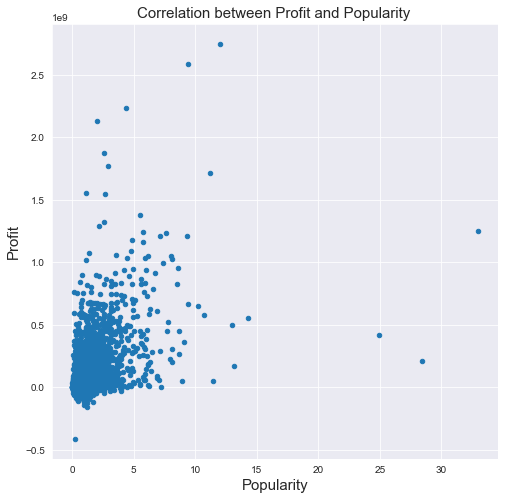

In [30]:
# scatter plot to view correlation between popularity and profit

df1.plot(x='popularity', y='profit', kind='scatter', figsize=(8,8))

plt.title("Correlation between Profit and Popularity ",fontsize=15)
plt.xlabel('Popularity',fontsize=15)
plt.ylabel("Profit",fontsize= 15);


#correlation between the variables
df1_corr = df1.corr()
print("Correlation Between Profit and Popularity : ",df1_corr.loc['popularity','profit'])

## Q3. What Movie Genre is most popular amongst people?

As stated in the data wrangling section, I will be selecting the rows without NaN from the original datafram for the analysis.

In [31]:
# select rows that are not NaN and create new dataframe for analysis
df_genre = df[df['genres'].notna()]

In [32]:
# confrim nymber of rows in genre
df_genre.shape[0]

10842

In [33]:
# to make the analysis easier, view only the columns we need
df_genre[['genres', 'popularity']].head(1)

,genres,popularity
0,Action|Adventure|Science Fiction|Thriller,32.985763


The dataframe above shows that the `genres` column has rows containing multiple movie genres with the same popularity in a specific year.
In order to properly analyze and determine which genre was the most popular by year, we need to seperate the rows that have multiple genres in the `genres` column into individual entity

In [34]:
from itertools import chain

# create a function that return list from series of comma-separated strings
def split_chain(a):
    return list(chain.from_iterable(a.str.split('|')))

In [35]:
# calculate length of splits
len_split = df_genre['genres'].str.split('|').map(len)

In [36]:
# create new dataframe, repeating or chaining as appropriate

df_genre_pop = pd.DataFrame({'genres': split_chain(df_genre['genres']),
                            'popularity': np.repeat(df_genre['popularity'], len_split)})

In [37]:
# reset own index and make default index as index
df_genre_pop.reset_index(inplace=True, drop=True)
df_genre_pop.head

<bound method NDFrame.head of                 genres  popularity
0               Action   32.985763
1            Adventure   32.985763
2      Science Fiction   32.985763
3             Thriller   32.985763
4               Action   28.419936
...                ...         ...
26950          Mystery    0.065141
26951           Comedy    0.065141
26952           Action    0.064317
26953           Comedy    0.064317
26954           Horror    0.035919

[26955 rows x 2 columns]>

In [38]:
# group genres by its popularity form largest to smallest
genre_by_popularity = df_genre_pop.groupby('genres').popularity.mean().sort_values(ascending=False)
genre_by_popularity.head(3)

genres
Adventure          1.154259
Science Fiction    1.001548
Fantasy            0.992840
Name: popularity, dtype: float64

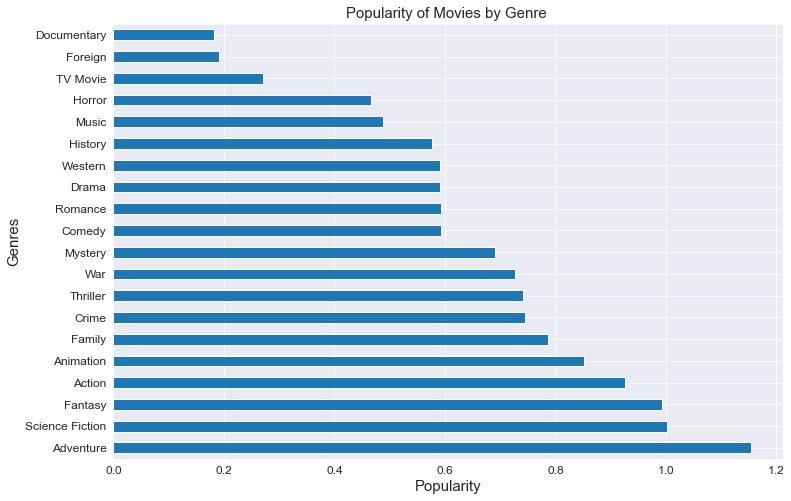

In [39]:
# bar chart to view the popularity of movies by genres
genre_by_popularity.plot(kind= 'barh',figsize = (12,8),fontsize=12)

plt.title("Popularity of Movies by Genre ",fontsize=15)
plt.xlabel('Popularity',fontsize=15)
plt.ylabel("Genres",fontsize= 15);

## Q4. Over the years, what genre has produced the most movies??

For this analysis, I will be using the `df_genre` dataframe from the previous question

In [40]:
# confrim nymber of rows in genre
df_genre.shape[0]

10842

In [41]:
# create a function that will split the string in column and return the count
def split_count(x):
    split_str = df_genre[x].str.cat(sep = '|')
    cnt = pd.Series(split_str.split('|'))
    data = cnt.value_counts(ascending=False)
    return data

In [42]:
count_movie_genre = split_count('genres')
count_movie_genre

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64

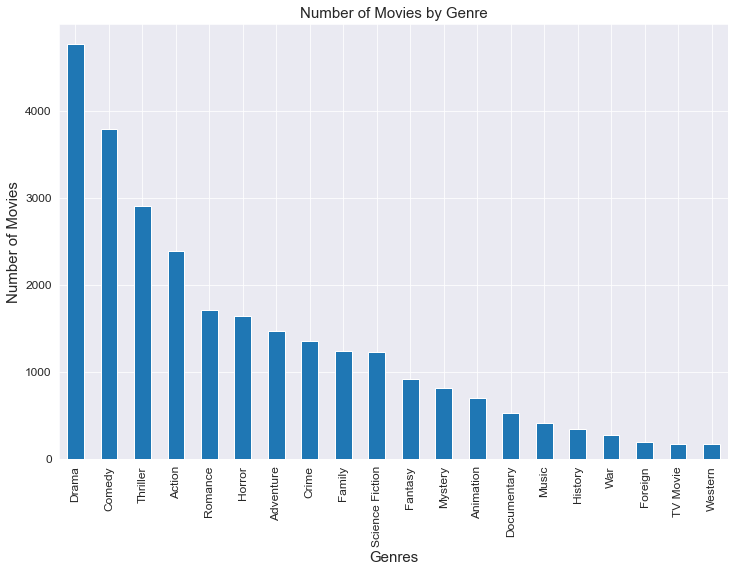

In [43]:
# bar chart that shows the number of movies by genre 
count_movie_genre.plot(kind= 'bar',figsize = (12,8),fontsize=12)

plt.title("Number of Movies by Genre",fontsize=15)
plt.xlabel('Genres',fontsize=15)
plt.ylabel("Number of Movies",fontsize= 15);

## Q5. Best Director based on Movie Popularity?

To preserve the quality of the entire dataset, I will not be dropping the NaN values in the `director` column of the dataframe. However, I will be selecting only the rows that are not NaN to answer the question

In [44]:
# select rows that are not NaN and create new dataframe for analysis
df_director = df[df['director'].notna()]

In [45]:
# calculate length of splits
len_split = df_director['director'].str.split('|').map(len)

In [46]:
# create new dataframe consisting of director and popularity columns
df_popular_dir = pd.DataFrame({'director': split_chain(df_director['director']),
                            'popularity': np.repeat(df_director['popularity'], len_split)})

In [47]:
# total number of directors
df_popular_dir.director.nunique()

5362

In [48]:
# Top 10 most popular directors
popular_directors = df_popular_dir.groupby('director').popularity.mean().sort_values(ascending=False).head(10)

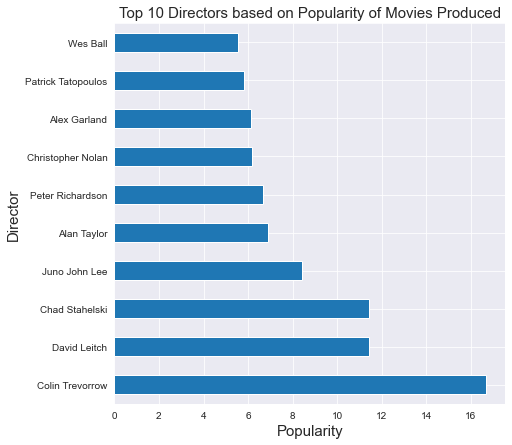

In [49]:
# bar chart of top directors based on the popularity of their movies
popular_directors.plot(kind='barh', figsize=(7,7))

plt.title("Top 10 Directors based on Popularity of Movies Produced",fontsize=15)
plt.xlabel('Popularity',fontsize=15)
plt.ylabel("Director",fontsize= 15);

## Q6. When are most movies released in the year?

I will be using the original data set for this analysis since it does not contain any NaN value in the `release_date` column

In [50]:
# extract months from years as numbers and confirm

df['month'] = df['release_date'].dt.month
df.month.head()

0     9
1     5
2     3
3    12
4     1
Name: month, dtype: int64

In [51]:
# total number of movies relased by month 
release_per_month = df.groupby('month').month.count()
release_per_month

month
1     1081
2      642
3      798
4      796
5      860
6      864
7      880
8      917
9     1085
10    1084
11     859
12     999
Name: month, dtype: int64

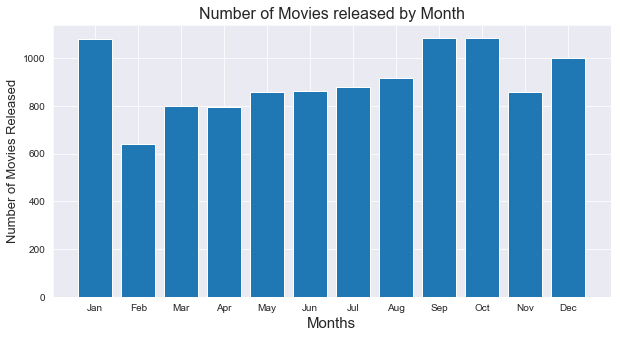

In [52]:
# bar chart of Number of Movies released by Month
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plt.subplots(figsize=(10,5))
plt.bar(months, release_per_month)
plt.title('Number of Movies released by Month', fontsize=(16))
plt.ylabel('Number of Movies Released', fontsize=(13))
plt.xlabel('Months', fontsize=(15));

<a id='conclusions'></a>
# Conclusions 

In this project, analysis has been done on to identify associations between different features. Although some variables seem to be strongly correlated to each other, we cannot imply there is a causal relationship.

1) From the analysis about revenue:

   - From the mid 1960's there was a continuous decline in revenue, with the mid 80's having the lowest revenues for movies. 
      
   - There is a moderatly positive correlation between revenue and popularity of movies.          - 
      
   - There is a weak positive correlation between revenue and average ratings of movies 
  
 There were a lot zero values in the data which questions the integrity of the data. However, additional research could be done with a larger and more recent dataset which could reveal compeltely different findings. 


2) There is a positive correlation of about 0.52 between a Movie's success and its popularity

3) Adventure seems to be the most popular genre that people watch. Additional reasearch could be done with dataset that includes other countries to identify most popular genre by country.

4) Since 1960, the most movies have been produced in the Drama genre.

5) Based on the popularity of the movies, Colin Trevorrow is the best director

6) Since the 1960's , most movies have been released in the month of January, September and October.


<a id='limitations'></a>
# Limitations

This project was limited due to several reasons;

- About 55% of the rows in the revenue and budget column were filled with zeros which compromised the integrity of the data, as there was insufficient data to perform proper analysis.


- The runtime was another huge limitation as runtime is not properly labelled. It can be seen that run time goes as high as 900 minutes which is rare. A lot of movies with runtime over 400 sec are televesion series whcih should not be considered a movie.

- The director column had 44 missing rows which is a huge factor in the analysis. Hence, the complete data of directors might have resulted in a different finding

# References

- [Split cell into multiple rows in pandas dataframe](https://stackoverflow.com/questions/50731229/split-cell-into-multiple-rows-in-pandas-dataframe)

- [Python for Data Analysis](https://www.oreilly.com/library/view/python-for-data/9781449323592/)